In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/sample_user_data.csv")

In [ ]:
df.head()

,Name,Email,DOB,Location,Gender,Income,Target
0,Stacey Reed DDS,edwardsjohn@schmidt.com,1965-11-26,Maryland,Female,40000,1
1,Cody Watson,darlenedunlap@martinez.com,1998-07-24,Port Juan,Male,50000,1
2,Amy Gamble,neil35@bartlett-cochran.com,1979-07-29,South Jasonport,Female,60000,1
3,James Villa,bbrown@gmail.com,1975-06-20,Aliciatown,Female,50000,0
4,Lisa Sweeney,tammyevans@yahoo.com,1992-08-13,Aaronberg,Female,30000,1


In [ ]:
df['Name'] = ['user_'+str(i+1) for i in range(len(df))]



In [ ]:
df['Email'] = ['Email_'+str(i+1) for i in range(len(df))]

In [ ]:
df.head()

,Name,Email,DOB,Location,Gender,Income,Target
0,user_1,Email_1,1965-11-26,Maryland,Female,40000,1
1,user_2,Email_2,1998-07-24,Port Juan,Male,50000,1
2,user_3,Email_3,1979-07-29,South Jasonport,Female,60000,1
3,user_4,Email_4,1975-06-20,Aliciatown,Female,50000,0
4,user_5,Email_5,1992-08-13,Aaronberg,Female,30000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      15 non-null     object
 1   Email     15 non-null     object
 2   DOB       15 non-null     object
 3   Location  15 non-null     object
 4   Gender    15 non-null     object
 5   Income    15 non-null     int64 
 6   Target    15 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 972.0+ bytes


In [ ]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [ ]:
df['YearOfBirth'] = df['DOB'].dt.year

In [ ]:
df['Age'] = 2025 - df['YearOfBirth']

In [ ]:
df.head()

,Name,Email,DOB,Location,Gender,Income,Target,YearOfBirth,Age
0,user_1,Email_1,1965-11-26,Maryland,Female,40000,1,1965,60
1,user_2,Email_2,1998-07-24,Port Juan,Male,50000,1,1998,27
2,user_3,Email_3,1979-07-29,South Jasonport,Female,60000,1,1979,46
3,user_4,Email_4,1975-06-20,Aliciatown,Female,50000,0,1975,50
4,user_5,Email_5,1992-08-13,Aaronberg,Female,30000,1,1992,33


In [ ]:
df['Age_group']=pd.cut(df['Age'],bins=[0,25,45,65,100],labels =['child','adult','senior','old'])

In [ ]:
df_anon = df.drop(columns=['DOB','Name','Email','Age','YearOfBirth','Location'])

In [ ]:
df_anon

,Gender,Income,Target,Age_group
0,Female,40000,1,senior
1,Male,50000,1,adult
2,Female,60000,1,senior
3,Female,50000,0,senior
4,Female,30000,1,adult
5,Female,70000,1,adult
6,Female,40000,0,adult
7,Male,70000,1,adult
8,Female,70000,1,adult
9,Male,70000,0,adult


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
df_model = df_anon.copy()
la_gender = LabelEncoder()
la_agegroup = LabelEncoder()

df_model['Gender'] = la_gender.fit_transform(df_model['Gender'])
df_model['Age_group'] = la_agegroup.fit_transform(df_model['Age_group'])

X = df_model[['Gender','Income','Age_group']]
y=df_model['Target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
# Training




# model = DecisionTreeClassifier(max_depth=3,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
import shap
# Extract the actual trained model and transformer
preprocessor = model.named_steps['standardscaler']
log_reg = model.named_steps['linearregression']

# Transform X_train for explainer background
X_transformed = preprocessor.transform(X_train)

# Create explainer
explainer = shap.LinearExplainer(log_reg, X_transformed, feature_perturbation="interventional")

# SHAP values for test data
shap_values = explainer.shap_values(preprocessor.transform(X_test))

# Plot
shap.summary_plot(shap_values, X_test, feature_names=your_feature_names)



AttributeError: 'LinearRegression' object has no attribute 'named_steps'

In [ ]:

class_idx = 1  # For binary classification: class 1


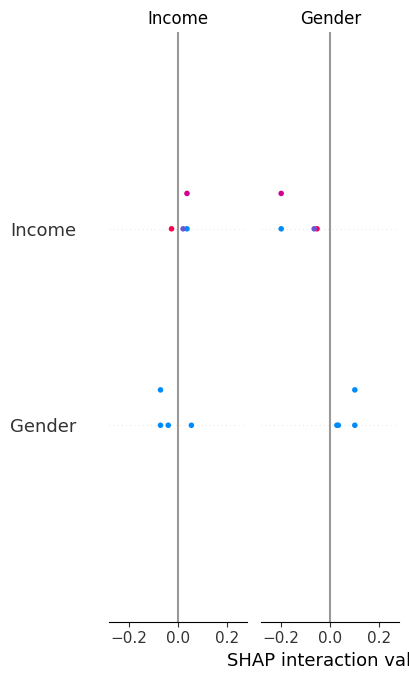

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)



/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


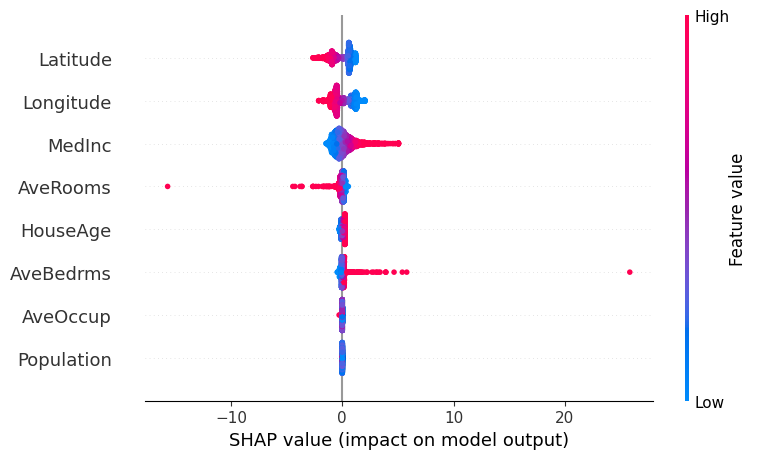

In [ ]:
# Imports
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load California housing data
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

# Get SHAP values for test data
shap_values = explainer.shap_values(X_test)

# SHAP Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# (Optional) Explain a single prediction with force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer  # classification dataset
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

# For classification, shap_values is a **list**: one entry per class
shap_values = explainer.shap_values(X_test)




/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


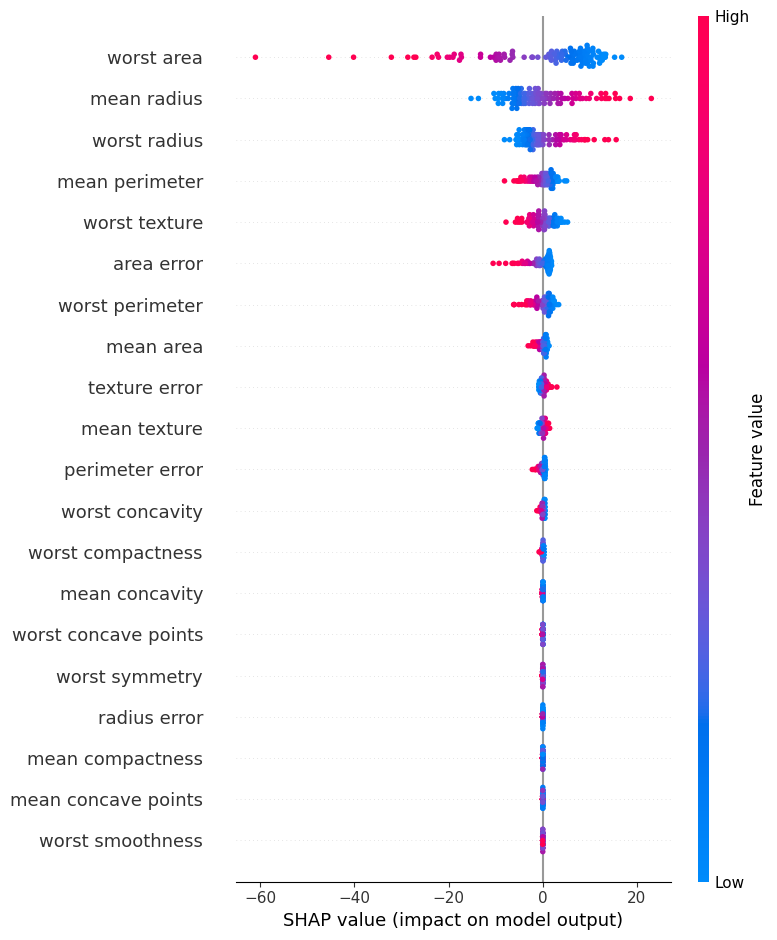

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


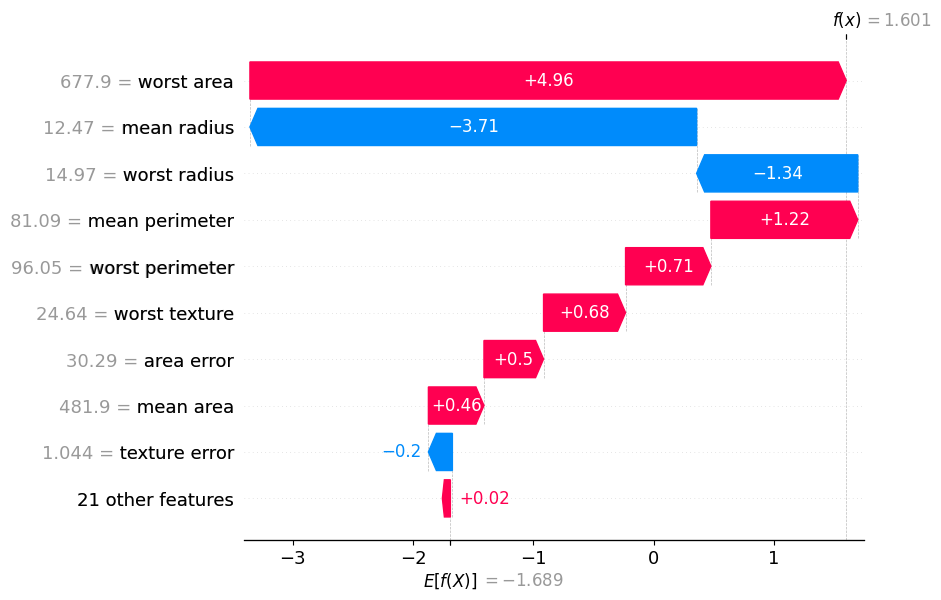

In [ ]:
import shap
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Use the new SHAP Explainer (automatically picks the right type)
explainer = shap.Explainer(model, X_train)

# Get SHAP values (this will be a shap.Explanation object)
shap_values = explainer(X_test)

# ✅ Plot waterfall plot for a single prediction (e.g., first test sample)
shap.plots.waterfall(shap_values[0])
